<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Анализ-недостуных-признаков-в-тестовой-выборке" data-toc-modified-id="Анализ-недостуных-признаков-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ недостуных признаков в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Взаимосвязь-данных" data-toc-modified-id="Взаимосвязь-данных-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Взаимосвязь данных</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb)</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья" data-toc-modified-id="Распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-веществ" data-toc-modified-id="Суммарная-концентрация-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Сводные-таблицы-результатов" data-toc-modified-id="Сводные-таблицы-результатов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сводные таблицы результатов</a></span></li></ul></li><li><span><a href="#Проверка-модели" data-toc-modified-id="Проверка-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

### Изучение данных

Импортируем нужные библиотеки

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score

Прочитаем файлы /datasets/gold_recovery_train_new.csv, /datasets/gold_recovery_test_new.csv, /datasets/gold_recovery_full_new.csv и сохраним их в переменных `train`, `test`, `full`.

In [2]:
# читаем файл и сохраняем его в train
train = pd.read_csv('/datasets/gold_recovery_train_new.csv') 

In [3]:
# читаем файл и сохраняем его в test
test = pd.read_csv('/datasets/gold_recovery_test_new.csv') 

In [4]:
# читаем файл и сохраняем его в full
full = pd.read_csv('/datasets/gold_recovery_full_new.csv') 

Из описания к данным известно, что:

* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* Xanthate **— ксантогенат (промотер, или активатор флотации);
* Sulphate — сульфат (на данном производстве сульфид натрия);
* Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

Параметры этапов: 

* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

Наименовая этапов :

* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Тип параметров:

* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

Напишем функцию, которая выводит общую информацию о таблице, а так же посчитает пропуски и проверит на наличие дубликатов.

In [5]:
#пишем функцию summary
def summary(df):
    print(df.info())
    display(df.head())
    count=0
    for col in df.columns:
        if df.isna().sum()[col]==0:
            count+=1
        else:
            print(f'Пропущенных значений в столбце {col}: {df.isna().sum()[col]}')
    if count==len(df.columns):
        print('Пропущенных значений в таблице нет')
    print(f'Повторов в таблице {df.duplicated().sum()}')  

In [6]:
summary(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Пропущенных значений в столбце final.output.concentrate_ag: 1
Пропущенных значений в столбце final.output.concentrate_pb: 1
Пропущенных значений в столбце final.output.concentrate_sol: 211
Пропущенных значений в столбце final.output.tail_pb: 100
Пропущенных значений в столбце final.output.tail_sol: 5
Пропущенных значений в столбце primary_cleaner.input.sulfate: 20
Пропущенных значений в столбце primary_cleaner.input.depressant: 32
Пропущенных значений в столбце primary_cleaner.input.xanthate: 100
Пропущенных значений в столбце primary_cleaner.output.concentrate_pb: 86
Пропущенных значений в столбце primary_cleaner.output.concentrate_sol: 286
Пропущенных значений в столбце primary_cleaner.output.tail_ag: 1
Пропущенных значений в столбце primary_cleaner.output.tail_pb: 15
Пропущенных значений в столбце primary_cleaner.output.tail_sol: 46
Пропущенных значений в столбце primary_cleaner.state.floatbank8_a_air: 4
Пропущенных значений в столбце primary_cleaner.state.floatbank8_a_level: 1
Проп

In [7]:
summary(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Пропущенных значений в столбце primary_cleaner.input.sulfate: 4
Пропущенных значений в столбце primary_cleaner.input.depressant: 5
Пропущенных значений в столбце primary_cleaner.input.xanthate: 4
Пропущенных значений в столбце rougher.input.feed_rate: 3
Пропущенных значений в столбце rougher.input.feed_size: 1
Пропущенных значений в столбце rougher.input.feed_sol: 21
Пропущенных значений в столбце rougher.input.floatbank10_sulfate: 5
Пропущенных значений в столбце rougher.input.floatbank11_sulfate: 8
Пропущенных значений в столбце rougher.input.floatbank11_xanthate: 25
Пропущенных значений в столбце secondary_cleaner.state.floatbank2_a_air: 3
Пропущенных значений в столбце secondary_cleaner.state.floatbank2_b_air: 2
Пропущенных значений в столбце secondary_cleaner.state.floatbank3_a_air: 9
Повторов в таблице 0


In [8]:
summary(full)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Пропущенных значений в столбце final.output.concentrate_ag: 1
Пропущенных значений в столбце final.output.concentrate_pb: 1
Пропущенных значений в столбце final.output.concentrate_sol: 211
Пропущенных значений в столбце final.output.tail_ag: 1
Пропущенных значений в столбце final.output.tail_pb: 101
Пропущенных значений в столбце final.output.tail_sol: 6
Пропущенных значений в столбце primary_cleaner.input.sulfate: 24
Пропущенных значений в столбце primary_cleaner.input.depressant: 37
Пропущенных значений в столбце primary_cleaner.input.xanthate: 104
Пропущенных значений в столбце primary_cleaner.output.concentrate_pb: 116
Пропущенных значений в столбце primary_cleaner.output.concentrate_sol: 370
Пропущенных значений в столбце primary_cleaner.output.tail_ag: 4
Пропущенных значений в столбце primary_cleaner.output.tail_pb: 21
Пропущенных значений в столбце primary_cleaner.output.tail_sol: 62
Пропущенных значений в столбце primary_cleaner.state.floatbank8_a_air: 4
Пропущенных значений в 

### Проверка эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между расчётами и значением признака.

In [10]:
# вычислим эффективность обогащения
train['rougher.output.recovery_calc'] = ((train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] 
                                                                                 - train['rougher.output.tail_au']))
                                        /(train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] 
                                                                           - train['rougher.output.tail_au']))) * 100

Найдём среднюю абсолютную ошибку между вычисленным значением и значением признака.

In [11]:
# вычисляем MAE
mean_absolute_error(train['rougher.output.recovery'], train['rougher.output.recovery_calc'])

9.73512347450521e-15

Средняя абсолютная ошибка равна 0. Значит ффективность обогащения рассчитана правильно.

### Анализ недостуных признаков в тестовой выборке

В тестовой выборке недоступны 34 признака. Т.е. доступны только входные параметры сырья/реагентов для этапов флотации и первичной - вторичной очистки. Так же недоступны праметры финального(выходного) этапа. Недоступные параметры относятся к типу - параметры продукта. Т.к. для обучения модели и для её проверки, количество признаков должно быть одинаково, удалим в тренировочной выборке признаки, которых нет в тестовой.

In [12]:
train = train[test.columns.tolist() + ['rougher.output.recovery', 'final.output.recovery']]

### Предобработка данных

#### Обработка пропусков

Из условия задачи сказано, что соседние по времени параметры часто похожи. Произведём замену пропусков с помощью метода ffill.

In [13]:
#заменяем пропуски в тренировочной выборке
train = train.fillna(method='ffill')

In [14]:
#заменяем пропуски в тестовой выборке
test = test.fillna(method='ffill')

In [15]:
# заменяем пропуски в исходном датасете
full = full.fillna(method='ffill')

#### Взаимосвязь данных

Посмотрим на взаимосвязь целевого признака и признаков. Найдём корреляцию между ними на обучающей выборке, т.к. она самая большая и если там найдется корреляция она наверняка будет и на всех данных.

In [16]:
corr = train.corr()\
    .sort_values('rougher.output.recovery', ascending=False)\
    .reset_index()
corr[['index', 'rougher.output.recovery']].style.background_gradient('coolwarm')

,index,rougher.output.recovery
0,rougher.output.recovery,1.000000
1,final.output.recovery,0.328307
2,primary_cleaner.input.sulfate,0.272823
3,secondary_cleaner.state.floatbank4_a_air,0.250773
4,secondary_cleaner.state.floatbank4_b_air,0.240501
5,rougher.input.floatbank10_xanthate,0.238468
6,rougher.input.floatbank11_xanthate,0.216100
7,secondary_cleaner.state.floatbank3_a_air,0.190365
8,secondary_cleaner.state.floatbank5_a_air,0.189475
9,rougher.input.feed_sol,0.184105


Из полученной таблицы видно, что нет сильной корреляции между признаками и целевым признаком.

**Вывод**

* были открыты и изучены обучающая с тестовой выборки и таблица с исходными данными
* был проверен расчёт эффективности обогащения чернового концентрата
* были заменены пропуски в данных
* была исследована зависимость целевого признака от признаков

## Анализ данных

### Концентрация металлов (Au, Ag, Pb)

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Посмотрим как меняется концентрация золота на этапах очистки. Создадим датафрейм `full_au` и сохраним в него только значения с концентрацияи золота на различных этапах очистки.

In [17]:
# создаём full_au и сохраняём в неё нужные столбы
full_au = full.iloc[: , [4, 17, 39, 47]].copy() 

In [18]:
# смотрим на изменение концентрации золота
full_au.describe()

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.input.feed_au,rougher.output.concentrate_au
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,44.076513,32.119400,8.266097,19.772000
std,5.129784,5.627611,1.955092,3.753600
min,0.000000,0.000000,0.010000,0.000000
25%,43.402215,30.463140,6.854384,18.802523
50%,45.011244,32.841295,8.125839,20.280214
75%,46.275313,35.048006,9.769917,21.717843
max,52.756638,45.933934,13.731330,28.824507


Построим гистограммы и посмотрим, как меняется концетрация золота на различных этапах.

Text(0.5, 1.0, 'Распределение концентрации золота')

<Figure size 1368x720 with 0 Axes>

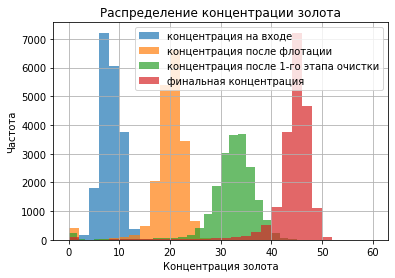

In [21]:
# строим гистограммы распределения концентрации золота
plt.figure(figsize=(19,10))
ax = full_au.plot(
    kind='hist',
    y='rougher.input.feed_au',
    range=(0, 60),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='концентрация на входе',
)
full_au.plot(
    kind='hist',
    y='rougher.output.concentrate_au',
    range=(0, 60),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='концентрация после флотации',
    ax=ax,
    grid=True,
    legend=True,
)

full_au.plot(
    kind='hist',
    y='primary_cleaner.output.concentrate_au',
    range=(0, 50),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='концентрация после 1-го этапа очистки',
    ax=ax,
    grid=True,
    legend=True,
)
full_au.plot(
    kind='hist',
    y='final.output.concentrate_au',
    range=(0, 60),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='финальная концентрация',
    ax=ax,
    grid=True,
    legend=True,
)
plt.xlabel('Концентрация золота')
plt.ylabel('Частота')
plt.title('Распределение концентрации золота')

Видно, что с каждым последующим этапом очистки концентрация золота увеличивается. На каждом этапе среднее значение близко к медианому, а так же судя по максимальным значениям, можно сделать выводы, что данные не содержат выбросов.

Посмотрим как меняется концентрация серебра на этапах очистки. Создадим датафрейм `full_ag` и сохраним в него только значения с концентрацияи серебра на различных этапах очистки.

In [22]:
# создаём full_ag и сохраняём в неё нужные столбы
full_ag = full.iloc[: , [1, 14, 34, 44]].copy() 

In [23]:
# смотрим на изменение концентрации серебра
full_ag.describe()

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.input.feed_ag,rougher.output.concentrate_ag
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,5.168387,8.442408,8.794927,11.994759
std,1.372362,2.054465,1.936847,2.733862
min,0.000000,0.000000,0.010000,0.000000
25%,4.251000,7.263288,7.237967,10.628337
50%,5.066039,8.507298,8.593574,12.098115
75%,5.895401,9.809001,10.213771,13.736996
max,16.001945,16.081632,14.596026,24.480271


Text(0.5, 1.0, 'Распределение концентрации серебра')

<Figure size 864x504 with 0 Axes>

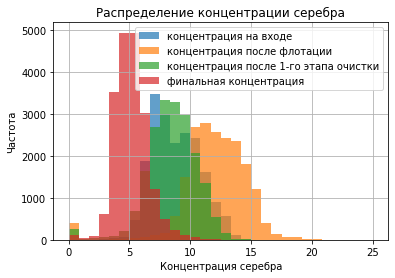

In [24]:
plt.figure(figsize=(12,7))
ax = full_ag.plot(
    kind='hist',
    y='rougher.input.feed_ag',
    range=(0, 25),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='концентрация на входе',
)
full_ag.plot(
    kind='hist',
    y='rougher.output.concentrate_ag',
    range=(0, 25),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='концентрация после флотации',
    ax=ax,
    grid=True,
    legend=True,
)

full_ag.plot(
    kind='hist',
    y='primary_cleaner.output.concentrate_ag',
    range=(0, 25),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='концентрация после 1-го этапа очистки',
    ax=ax,
    grid=True,
    legend=True,
)
full_ag.plot(
    kind='hist',
    y='final.output.concentrate_ag',
    range=(0, 25),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='финальная концентрация',
    ax=ax,
    grid=True,
    legend=True,
)
plt.xlabel('Концентрация серебра')
plt.ylabel('Частота')
plt.title('Распределение концентрации серебра')

Видно, что с каждым последующим этапом очистки концентрация серебра наоборот уменьшается. На каждом этапе среднее значение близко к медианому, а так же судя по максимальным значениям, можно сделать выводы, что данные не содержат выбросов.

Посмотрим как меняется концентрация свинца на этапах очистки. Создадим датафрейм `full_pb` и сохраним в него только значения с концентрацияи свинца на различных этапах очистки.

In [25]:
# создаём full_pb и сохраняём в неё нужные столбы
full_pb = full.iloc[: , [2, 15, 35, 45]].copy() 

In [26]:
# смотрим на изменение концентрации свинца
full_pb.describe()

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.input.feed_pb,rougher.output.concentrate_pb
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,9.978821,9.810317,3.585096,7.606272
std,1.669228,2.572253,1.062972,1.796757
min,0.000000,0.000000,0.010000,0.000000
25%,9.137225,8.676500,2.872178,6.725987
50%,10.102264,10.142270,3.528235,7.742580
75%,11.035644,11.416298,4.241005,8.565199
max,17.031899,17.081278,7.142594,13.617072


Text(0.5, 1.0, 'Распределение концентрации свинца')

<Figure size 864x504 with 0 Axes>

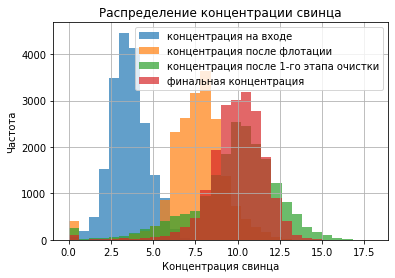

In [27]:
plt.figure(figsize=(12,7))
ax = full_pb.plot(
    kind='hist',
    y='rougher.input.feed_pb',
    range=(0, 18),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='концентрация на входе',
)
full_pb.plot(
    kind='hist',
    y='rougher.output.concentrate_pb',
    range=(0, 18),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='концентрация после флотации',
    ax=ax,
    grid=True,
    legend=True,
)

full_pb.plot(
    kind='hist',
    y='primary_cleaner.output.concentrate_pb',
    range=(0, 18),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='концентрация после 1-го этапа очистки',
    ax=ax,
    grid=True,
    legend=True,
)
full_pb.plot(
    kind='hist',
    y='final.output.concentrate_pb',
    range=(0, 18),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='финальная концентрация',
    ax=ax,
    grid=True,
    legend=True,
)
plt.xlabel('Концентрация свинца')
plt.ylabel('Частота')
plt.title('Распределение концентрации свинца')

Концентрация свинца незначительно, но увеличивается. Данные без выбросов.

**Вывод**
* концентрация золота от стадии флотации к финальной стадии увеличивается
* концентрация серебра снижается
* концентрация свинца незначительно увеличивается

###  Распределения размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

In [28]:
train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [29]:
test['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

Text(0.5, 1.0, 'Распределение размеров гранул сырья')

<Figure size 864x504 with 0 Axes>

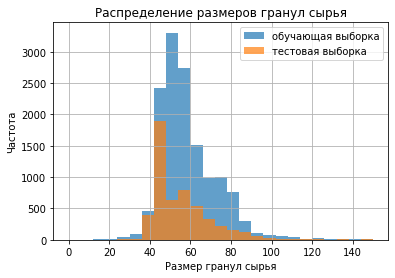

In [30]:
plt.figure(figsize=(12,7))
ax = train.plot(
    kind='hist',
    y='rougher.input.feed_size',
    range=(0, 150),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='обучающая выборка',
)
test.plot(
    kind='hist',
    y='rougher.input.feed_size',
    range=(0, 150),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='тестовая выборка',
    ax=ax,
    grid=True,
    legend=True,
)

plt.xlabel('Размер гранул сырья')
plt.ylabel('Частота')
plt.title('Распределение размеров гранул сырья')

Изучим распределение размеров гранул сырья после флотации.

Text(0.5, 1.0, 'Распределение размеров гранул после флотации')

<Figure size 864x504 with 0 Axes>

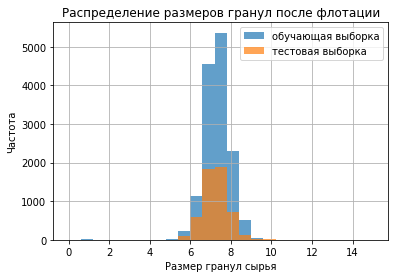

In [31]:
plt.figure(figsize=(12,7))
ax = train.plot(
    kind='hist',
    y='primary_cleaner.input.feed_size',
    range=(0, 15),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='обучающая выборка',
)
test.plot(
    kind='hist',
    y='primary_cleaner.input.feed_size',
    range=(0, 15),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='тестовая выборка',
    ax=ax,
    grid=True,
    legend=True,
)

plt.xlabel('Размер гранул сырья')
plt.ylabel('Частота')
plt.title('Распределение размеров гранул после флотации')

**Вывод**
* основной диапазон значений гранул сырья что для тестовой, что для обучающей выборок: 40-60
* максимальная частота у тестовой выборки - 45, у обучающей - 55.
* можно сказать, что распределения несильно отличаются друг от друга
* основной диапазон значений гранул сырья после флотации что для тестовой, что для обучающей выборок:6-8
* Можно сказать, что распределения не отличаются друг от друга.

### Суммарная концентрация веществ

Исследуем суммарную концентрацию всех веществ на разных стадиях: на входе, в сырье, в черновом и финальном концентратах.

Найдём суммарную концентрацию всех веществ в сырье.

In [33]:
# суммарная концентрация всех вещест в сырье
full['rougher_concentrate'] = full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_sol'] 

In [34]:
# смотрим на характер распределения
full['rougher_concentrate'].describe()

count    19439.000000
mean        68.170865
std         12.491279
min          0.000000
25%         66.012495
50%         70.181495
75%         74.356904
max         88.140119
Name: rougher_concentrate, dtype: float64

Text(0.5, 1.0, 'Суммарная концентрация всех веществ в сырье')

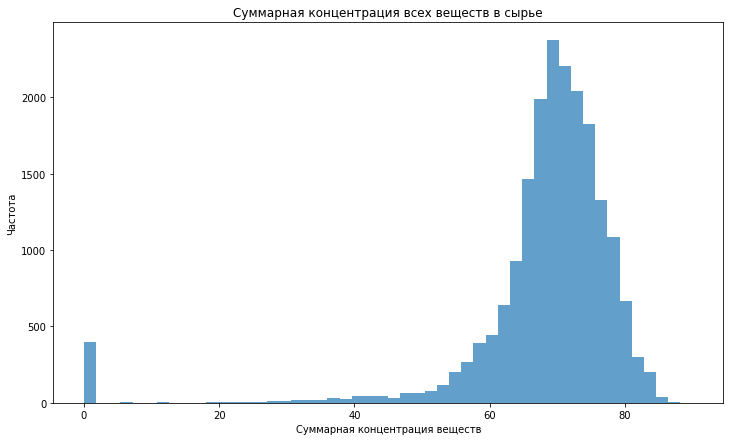

In [35]:
plt.figure(figsize=(12,7))
full['rougher_concentrate'].plot(
    kind='hist',
    y='rougher_concentrate',
    range=(0, 90),
    bins=50,
    linewidth=5,
    alpha=0.7)

plt.xlabel('Суммарная концентрация веществ')
plt.ylabel('Частота')
plt.title('Суммарная концентрация всех веществ в сырье')

Заметно наличие суммарной концентрации равной 0. Это выбросы. Эти столбы при обучении модели не учитываются, удалять не буду.

Найдём суммарную концентрацию всех веществ на входе.

In [36]:
# суммарная концентрация всех вещест на входе
full['rougher_concentrate_in'] = full['rougher.input.feed_au'] + full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_sol']

In [37]:
# смотрим на рспределение
full['rougher_concentrate_in'].describe()

count    19439.000000
mean        57.320789
std          7.212680
min          0.040000
25%         53.557679
50%         57.594391
75%         61.953459
max         76.978947
Name: rougher_concentrate_in, dtype: float64

Text(0.5, 1.0, 'Суммарная концентрация всех веществ на входе')

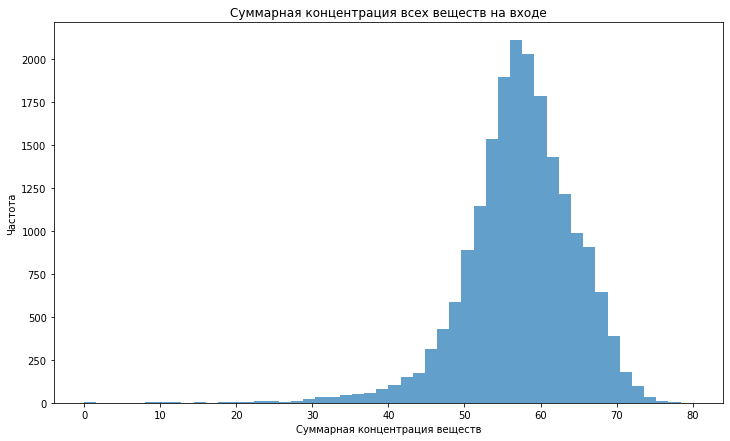

In [38]:
plt.figure(figsize=(12,7))
full['rougher_concentrate_in'].plot(
    kind='hist',
    y='rougher_concentrate_in',
    range=(0, 80),
    bins=50,
    linewidth=5,
    alpha=0.7)

plt.xlabel('Суммарная концентрация веществ')
plt.ylabel('Частота')
plt.title('Суммарная концентрация всех веществ на входе')

Найдём суммарную концентрацию всех веществ в черновом концентрате

In [39]:
# суммарная концентрация всех вещест в черновом концентрате
full['primary_concentrate'] = full['primary_cleaner.output.concentrate_au'] + full['primary_cleaner.output.concentrate_ag'] + full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_sol']

In [40]:
# смотрим на распределение
full['primary_concentrate'].describe()

count    19439.000000
mean        60.764731
std         10.017271
min          0.000000
25%         58.929364
50%         62.497674
75%         65.667336
max         80.749343
Name: primary_concentrate, dtype: float64

Text(0.5, 1.0, 'Суммарная концентрация всех веществ в черновом концентрате')

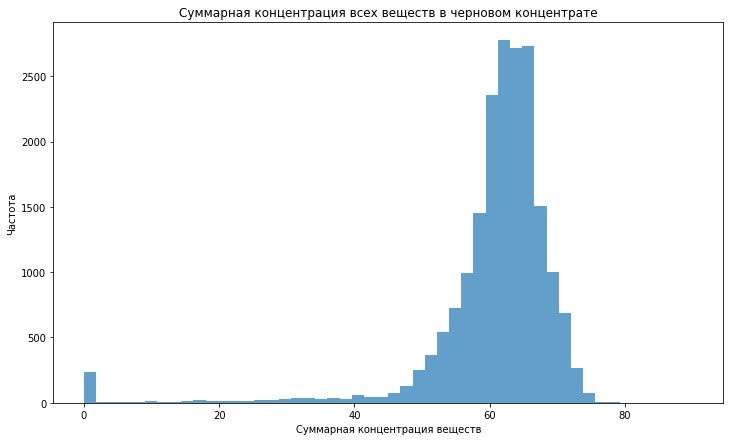

In [41]:
plt.figure(figsize=(12,7))
full['primary_concentrate'].plot(
    kind='hist',
    y='primary_concentrate',
    range=(0, 90),
    bins=50,
    linewidth=5,
    alpha=0.7)

plt.xlabel('Суммарная концентрация веществ')
plt.ylabel('Частота')
plt.title('Суммарная концентрация всех веществ в черновом концентрате')

Найдём суммарную концентрацию всех веществ в финальном концентрате.

In [42]:
# суммарная концентрация всех вещест в финальном концентрате
full['final_concentrate'] = full['final.output.concentrate_au'] + full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_sol']

In [43]:
# смотрим на рспределение
full['final_concentrate'].describe()

count    19439.000000
mean        68.653624
std          7.427536
min          0.000000
25%         67.932362
50%         69.598444
75%         71.368472
max         80.210644
Name: final_concentrate, dtype: float64

Text(0.5, 1.0, 'Суммарная концентрация всех веществ в финальном концентрате')

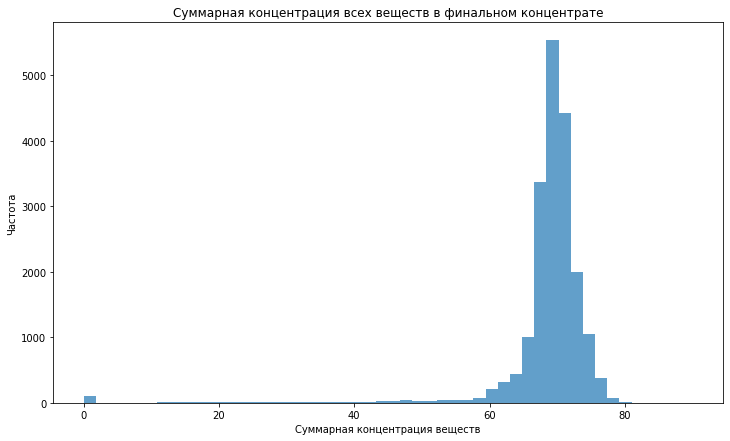

In [44]:
plt.figure(figsize=(12,7))
full['final_concentrate'].plot(
    kind='hist',
    y='final_concentrate',
    range=(0, 90),
    bins=50,
    linewidth=5,
    alpha=0.7)

plt.xlabel('Суммарная концентрация веществ')
plt.ylabel('Частота')
plt.title('Суммарная концентрация всех веществ в финальном концентрате')

**Вывод**
* была исследована суммарная концентрация веществ на разных этапах очистки

## Построение модели

Для дальнейшей работы перенесём целевые признаки: эффективность обогащения чернового концентрата `rougher.output.recovery` и эффективность обогащения финального концентрата `final.output.recovery` из исходных данных в обучающую и тестовую выборки.

In [45]:
# создаём full_target и сохраняём в неё нужные столбы
full_target = full.iloc[: , [0, 5, 48]].copy() 

Установим столбец с датой в качестве индексов для тестовой выборки и в `full_target`.

In [46]:
# преобразуем столбец с датой в индексы на тестовой выборке
test = test.set_index('date')

In [47]:
# преобразуем столбец с датой в индексы в full_target
full_target=full_target.set_index('date')

Добавим в тестовую выборку целевые признаки.

In [49]:
# добавляем целевые признаки
test_final = test.merge(full_target, left_index = True, right_index=True)

In [50]:
# смотрим на получившуюся таблицу
summary(test_final)

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367


Пропущенных значений в таблице нет
Повторов в таблице 0


In [51]:
train=train.drop(['date'], axis=1)

In [52]:
# смотрим на получившуюся таблицу
summary(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               14149 non-null  float64
 1   primary_cleaner.input.depressant            14149 non-null  float64
 2   primary_cleaner.input.feed_size             14149 non-null  float64
 3   primary_cleaner.input.xanthate              14149 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    14149 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      14149 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    14149 non-null  float64
 10  primary_cl

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016


Пропущенных значений в таблице нет
Повторов в таблице 0


В итоговых таблицах пропусков нет, повторов нет. Можно приступать к обучению моделей.

Напишем функцию для расчёта sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

In [53]:
# напишем функцию для расчёта sMAPE
def smape(target, prediction):
    return (np.sum(2 * np.abs(target - prediction) / (np.abs(target) + np.abs(prediction)))*100)/len(target)

In [54]:
# напишем функцию для подсчёта итогового sMAPE
def final_smape(smape_rougher, smape_final):
    final_smape = 0.25*smape_rougher + 0.75*smape_final
    return final_smape

Зададим признаки и целевые признаки

In [55]:
# задаём признаки и целевые признаки
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_rougher_train = train['rougher.output.recovery']
target_final_train = train['final.output.recovery']
features_test = test_final.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_rougher_test = test_final['rougher.output.recovery']
target_final_test = test_final['final.output.recovery']

In [56]:
score = make_scorer(smape, greater_is_better=False)
state = np.random.RandomState(12345)

### Линейная регрессия

In [57]:
# вычислим smape для линейной регрессии
model = LinearRegression()
scores_lin_rougher = cross_val_score(model, features_train, target_rougher_train, cv=5, scoring = score).mean()
scores_lin_final = cross_val_score(model, features_train, target_final_train, cv=5, scoring = score).mean()
smape_lin = final_smape(scores_lin_rougher, scores_lin_final)
print(scores_lin_rougher)
print(scores_lin_final)
print(f'Итоговое симметричное среднее абсолютное процентное отклонение: {smape_lin}')

-12.802483458481905
-12.245300320302215
Итоговое симметричное среднее абсолютное процентное отклонение: -12.384596104847137


### Случайный лес

In [58]:
best_model = None
best_result_r = -100
best_depth = 0
best_est = 0
for est in range(1, 15, 2):
    for depth in range(1, 15, 2):
        model_random_forest_r = RandomForestRegressor(random_state=state, n_estimators=est, max_depth=depth)
        model_random_forest_r.fit(features_train, target_rougher_train)
        scores_random_forest_r = cross_val_score(model_random_forest_r, features_train, target_rougher_train, cv=5, scoring = score).mean()
            
        if scores_random_forest_r > best_result_r:
            best_model = model_random_forest_r
            best_result_r = scores_random_forest_r
            best_depth = depth
            best_est = est
            
                
display('sMAPE модели случайного леса для чернового концентрата:', best_result_r, 'Количество деревьев:', best_depth, 'Максимальная глубина:', best_est)  

'sMAPE модели случайного леса для чернового концентрата:'

-11.024048105815002

'Количество деревьев:'

5

'Максимальная глубина:'

11

In [59]:
best_model = None
best_result_f = -100
best_depth = 0
best_est = 0
for est in range(1, 15, 2):
    for depth in range(1, 15, 2):
        model_random_forest_f = RandomForestRegressor(random_state=state, n_estimators=est, max_depth=depth)
        model_random_forest_f.fit(features_train, target_final_train)
        scores_random_forest_f  = cross_val_score(model_random_forest_f, features_train, target_final_train, cv=5, scoring = score).mean()
            
        if scores_random_forest_f > best_result_f:
            best_model = model_random_forest_f
            best_result_f = scores_random_forest_f
            best_depth = depth
            best_est = est
            
                
display('sMAPE модели случайного леса для финального этапа:', best_result_f, 'Количество деревьев:', best_depth, 'Максимальная глубина:', best_est)  

'sMAPE модели случайного леса для финального этапа:'

-10.1572629371012

'Количество деревьев:'

5

'Максимальная глубина:'

13

Вычислим итоговую sMAPE для модели случайного леса.

In [60]:
smape_forest = final_smape(best_result_r, best_result_f)
print(smape_forest)

-10.373959229279649


### Решающее дерево

In [61]:
# вычислим sMAPE для модели случайный лес чернового концентрата
best_model = None
best_result_r_t = -100
best_depth = 0
best_split = 0
for split in range(2, 10,2):
    for depth in range(1, 15, 2):
        model_tree_r = DecisionTreeRegressor(random_state=state, min_samples_split=split, max_depth=depth)
        model_tree_r.fit(features_train, target_rougher_train)
        predicted_test_tree_r = model_tree_r.predict(features_test)
        scores_tree_r = cross_val_score(model_tree_r, features_train, target_rougher_train, cv=5, scoring = score).mean()
            
        if scores_tree_r > best_result_r_t:
            best_model = model_tree_r
            best_result_r_t = scores_tree_r
            best_depth = depth
            best_split = split
            
                
display('sMAPE модели решающего дерева для чернового концентрата:', best_result_r_t) 

'sMAPE модели решающего дерева для чернового концентрата:'

-11.401952727337251

In [62]:
# вычислим sMAPE для модели решающего дерева финального концентрата
best_model = None
best_result_f_t = -100
best_depth = 0
best_split = 0
for split in range(2, 10,2):
    for depth in range(1, 15, 2):
        model_tree_f = DecisionTreeRegressor(random_state=state, min_samples_split=split, max_depth=depth)
        model_tree_f.fit(features_train, target_final_train)
        predicted_test_tree_f = model_tree_f.predict(features_test)
        scores_tree_f = cross_val_score(model_tree_f, features_train, target_final_train, cv=5, scoring = score).mean()
            
        if scores_tree_f > best_result_f_t:
            best_model = model_tree_f
            best_result_f_t = scores_tree_f
            best_depth = depth
            best_split = split
            
                
display('sMAPE модели решающего дерева для финального концентрата:', best_result_f_t) 

'sMAPE модели решающего дерева для финального концентрата:'

-10.806104806167765

Вычислим итоговую sMAPE для модели решающего дерева.

In [63]:
smape_tree = final_smape(best_result_r_t, best_result_f_t)
print(smape_tree)

-10.955066786460137


### Сводные таблицы результатов

Соберём полученные результаты в 2 таблицы для наглядности

In [64]:
res=pd.DataFrame(columns=['name_model', 'sMAPE'])

In [65]:
res=res.append({"name_model":"lin_rougher", 'sMAPE':scores_lin_rougher}, ignore_index=True)
res=res.append({"name_model":"lin_final", 'sMAPE':scores_lin_final}, ignore_index=True)
res=res.append({"name_model":"random_forest_r", 'sMAPE':best_result_r}, ignore_index=True)
res=res.append({"name_model":"random_forest_f", 'sMAPE':best_result_f}, ignore_index=True)
res=res.append({"name_model":"model_tree_r", 'sMAPE':best_result_r_t}, ignore_index=True)
res=res.append({"name_model":"model_tree_f", 'sMAPE':best_result_f_t}, ignore_index=True)
display(res.head(6))

,name_model,sMAPE
0,lin_rougher,-12.802483
1,lin_final,-12.245300
2,random_forest_r,-11.024048
3,random_forest_f,-10.157263
4,model_tree_r,-11.401953
5,model_tree_f,-10.806105


In [66]:
res_final=pd.DataFrame(columns=['name_model', 'final_sMAPE'])

In [67]:
res_final=res_final.append({"name_model":"lin_reg", 'final_sMAPE':smape_lin}, ignore_index=True)
res_final=res_final.append({"name_model":"random_forest", 'final_sMAPE':smape_forest}, ignore_index=True)
res_final=res_final.append({"name_model":"decision_tree", 'final_sMAPE':smape_tree}, ignore_index=True)
display(res_final.head(3))

,name_model,final_sMAPE
0,lin_reg,-12.384596
1,random_forest,-10.373959
2,decision_tree,-10.955067


**Вывод**
* в обучающую и тестовую выборки были добавлены значения целевого признака
* была написана функция для расчёта sMAPE
* была написана функция для расчёта итогового sMAPE
* были обучены 3 модели для 2-х целевых признаков и подсчитаны sMAPE для каждого случая
* отрицательные значения получились из-за установки `greater_is_better=False`
* лучшей моделью для прогнозирования:
 * эффективность обогащения чернового концентрата стала модель случайного леса
 * эффективность обогащения финального концентрата стала модель случайного леса
* итоговая sMAPE лучше у модели случайного леса 

## Проверка модели

Проверим модель случайного леса.

In [68]:
# проверяем модель на тестовой выборке
decision_model_f = RandomForestRegressor(random_state=state, n_estimators=13, max_depth=5)
decision_model_f.fit(features_train, target_final_train)
test_predictions_f = decision_model_f.predict(features_test)
sMAPE_f = smape(target_final_test, test_predictions_f)
display(sMAPE_f)

9.62432976403566

In [70]:
# проверяем модель на тестовой выборке
decision_model_r = RandomForestRegressor(random_state=state, n_estimators=13, max_depth=5)
decision_model_r.fit(features_train, target_rougher_train)
test_predictions_r = decision_model_r.predict(features_test)
sMAPE_r = smape(target_rougher_test, test_predictions_r)
display(sMAPE_r)

10.391734370006253

In [71]:
smape_for_final = final_smape(sMAPE_r, sMAPE_f)
print(smape_for_final)

9.816180915528308


## Вывод

* были открыты и изучены обучающая с тестовой выборки и таблица с исходными данными
* был проверен расчёт эффективности обогащения чернового концентрата
* были заменены пропуски в данных
* была исследована зависимость целевого признака от признаков
* была исследована суммарная концентрация веществ на разных этапах очистки
* были удалены выбросы в виде нулевой суммарной концентрации для каждого этапа очистки, всего 601 строка
* были написаны функции для расчёта sMAPE и итоговой sMAPE
* лучшей моделью для прогнозирования стала модель случайного леса
* итоговая sMAPE на тестовой выборке у модели случайного леса - 9.816180915528308